In [25]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import keras.layers

In [26]:
from zipfile import ZipFile
file_name = "/content/archive (2).zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content/sample_data')
  print('done')

done


In [27]:
TRAIN_DIR = '/content/sample_data/data'
IMG_SIZE = 224
MODEL_NAME = 'xray'

In [28]:
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = (image_name.split('.')[-3])
    if word_label == 'Cofield':
        return np.array([1,0,0,0])
    elif word_label == 'Zimmer':
        return np.array([0,1,0,0])
    elif word_label == 'Tornier':
       return np.array([0,0,1,0])
    elif word_label == 'Depuy':
       return np.array([0,0,0,1])

In [29]:
create_label('Cofield.1.jpg')

array([1, 0, 0, 0])

In [30]:
from skimage import data, img_as_float
from skimage import exposure
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        myimg=(np.array(img_data)/255)
        training_data.append([ myimg , create_label(img)])
    shuffle(training_data)
    return training_data

In [31]:
X =[]
y =[]
for features, label in create_train_data():
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1,224,224,3)
y=np.array(y)

100%|██████████| 597/597 [00:01<00:00, 516.96it/s]


In [32]:
X.shape

(597, 224, 224, 3)

In [33]:
X.shape

(597, 224, 224, 3)

In [34]:
y.shape

(597, 4)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
X_train.shape

(477, 224, 224, 3)

In [37]:
X_test.shape

(120, 224, 224, 3)

In [38]:
y_train.shape

(477, 4)

In [39]:
y_test.shape

(120, 4)

In [40]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    tf.keras. layers.RandomRotation(0.1),
     tf.keras.layers.RandomZoom(0.1),
  ]
)

In [41]:
model= tf.keras.Sequential([data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(224, 224,3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
   
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
    
])

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)      

In [43]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_train=model.fit(X_train, y_train, batch_size = 50, epochs = 10 ,validation_split=.2, verbose=1)

Epoch 1/10
8/8 [==============================] - 40s 5s/step - loss: 2.0560 - accuracy: 0.3071 - val_loss: 1.2530 - val_accuracy: 0.5729
Epoch 2/10
8/8 [==============================] - 38s 5s/step - loss: 1.2664 - accuracy: 0.4829 - val_loss: 1.2324 - val_accuracy: 0.5729
Epoch 3/10
8/8 [==============================] - 38s 5s/step - loss: 1.2576 - accuracy: 0.4803 - val_loss: 1.1980 - val_accuracy: 0.5729
Epoch 4/10
8/8 [==============================] - 38s 5s/step - loss: 1.2359 - accuracy: 0.4856 - val_loss: 1.1822 - val_accuracy: 0.5729
Epoch 5/10
8/8 [==============================] - 38s 5s/step - loss: 1.2475 - accuracy: 0.4908 - val_loss: 1.2085 - val_accuracy: 0.5729
Epoch 6/10
8/8 [==============================] - 38s 5s/step - loss: 1.2307 - accuracy: 0.4856 - val_loss: 1.1785 - val_accuracy: 0.5729
Epoch 7/10
8/8 [==============================] - 38s 5s/step - loss: 1.2346 - accuracy: 0.4829 - val_loss: 1.1868 - val_accuracy: 0.5729
Epoch 8/10
8/8 [==================

In [44]:
test_eval = model.evaluate(X_test,y_test, batch_size=200)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

1/1 [==============================] - 4s 4s/step - loss: 1.2734 - accuracy: 0.4583
Test loss: 1.273402452468872
Test accuracy: 0.4583333432674408


In [45]:
train_eval = model.evaluate(X_train,y_train, verbose=0)
print('Train loss:', train_eval[0])
print('Train accuracy:', train_eval[1])

Train loss: 1.16947603225708
Train accuracy: 0.5052410960197449


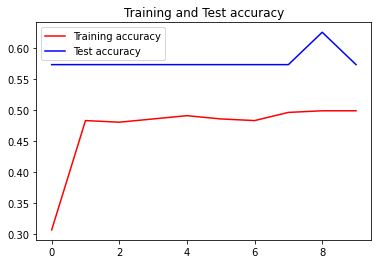

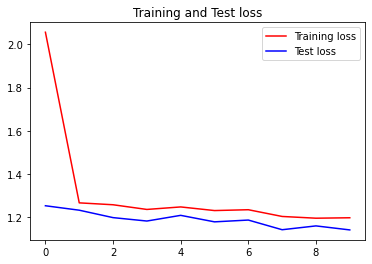

In [47]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
Test_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy',color='red')
plt.plot(epochs, val_accuracy, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss',color='red')
plt.plot(epochs, Test_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()
plt.show()